# Projet Tutoré : Pipeline DevOps-MLOps - Notebook d'Entraînement

**Membres du groupe :**

- MINTSA-MI OBAME Dimitri  
- Kouadio Konan

**Encadrant :** Mr KHIAT Azzedine  
**École :** HESTIM  

## Objectif de ce Notebook

Ce notebook AWS SageMaker a pour objectif de :

1. Charger et explorer le dataset Breast Cancer Wisconsin
2. Préparer les données pour l'entraînement
3. Entraîner un modèle Random Forest pour la classification binaire
4. Évaluer les performances du modèle
5. Sauvegarder le modèle au format `.pkl` pour le déploiement

# **SUJET : Machine Learning pour la Détection de Spam dans les Emails**  
**Lien du dataset :** [Spam Email Dataset](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset)  

## **Introduction au Projet de Détection de Spam**  

Dans le cadre de ce projet, nous allons explorer un **dataset de 83 446 emails** étiquetés comme **spam (1)** ou **non-spam (0)**. Ce jeu de données a été constitué en combinant deux sources principales :  
- Le **TREC 2007 Public Spam Corpus**  
- Le **Enron-Spam Dataset**  

L'objectif est de développer un **modèle de Machine Learning supervisé** capable de classifier automatiquement les emails en **spam** ou **ham (messages légitimes)**.  

## **Description des Données**  

Le dataset contient deux colonnes principales :  
1. **`label`** :  
   - **`1`** → Email classé comme **spam** (indésirable).  
   - **`0`** → Email légitime (**ham**).  
2. **`text`** : Le contenu textuel brut de l'email.  

- **Langue** : Anglais (mais les méthodes sont transférables au français).  

## **Importance de la Détection de Spam**  

La détection de spam est un **enjeu majeur** en cybersécurité et en gestion des communications, car :  
✔ **Réduit les risques de phishing** (arnaques par email).  
✔ **Filtre les publicités indésirables** pour améliorer la productivité.  
✔ **Protège contre les logiciels malveillants** (pièces jointes infectées).  

## **Applications et Perspectives**  

En utilisant ce dataset, nous allons :  
1. **Prétraiter** les emails (nettoyage de texte, tokenization, suppression des stopwords).  
2. **Vectoriser** le texte en features numériques (TF-IDF, Bag-of-Words).  
3. **Entraîner des modèles** de classification (Naive Bayes, SVM, Random Forest).  
4. **Évaluer la performance** avec des métriques comme :  
   - **Accuracy** (précision globale).  
   - **Precision/Recall** (détection des faux positifs/négatifs).  
   - **Matrice de confusion**.  

En conclusion, ce projet permettra de **comprendre les techniques de NLP (Natural Language Processing)** et de **construire un système automatique de filtrage de spam**, applicable aussi bien aux emails qu’aux SMS ou réseaux sociaux.  

### Importation des bibliothèques et chargement des données

In [1]:
!pip install --upgrade pip

# Versions recommandées
!pip install \
  scikit-learn==1.6.1 \
  numpy==1.26.4 \
  pandas==2.1.4 \
  joblib==1.4.0

In [2]:
# Importation des bibliothèques
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Chargement du fichier csv (dataset) dans un dataframe
data = pd.read_csv('spam.csv')

### Exploration des données

In [5]:
# Affichage de quelques données du dataframe
data.head(10)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...


- label : Variable catégorielle nominale
- text : Texte

In [6]:
# Dimensions
data.shape

(83448, 2)

- 83448 enregistrements et 2 variales

In [7]:
# Informations sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
# Distribution des classes
print("\nDistribution des labels:")
print(data['label'].value_counts())


Distribution des labels:
label
1    43910
0    39538
Name: count, dtype: int64


Les classes sont équilibrées :
- 43910 : spam
- 39538 : non spam

In [9]:
# Distribution en pourcentages
label_percentage = data['label'].value_counts(normalize=True) * 100
print("\nDistribution en pourcentage:")
print(label_percentage)


Distribution en pourcentage:
label
1    52.619595
0    47.380405
Name: proportion, dtype: float64


### Suppression des doublons

In [10]:
# Vérifications des doublons
doublons = data.duplicated()

# Nombre de doublons
print(f"Nombre de doublons : {doublons.sum()}")


Nombre de doublons : 0


### Gestion des valeurs manquantes

In [11]:
# Nombre de valeurs manquantes par colonne
print("Nombres de valeurs manquantes par colonne", data.isnull().sum())

Nombres de valeurs manquantes par colonne label    0
text     0
dtype: int64


### Visualisation des données

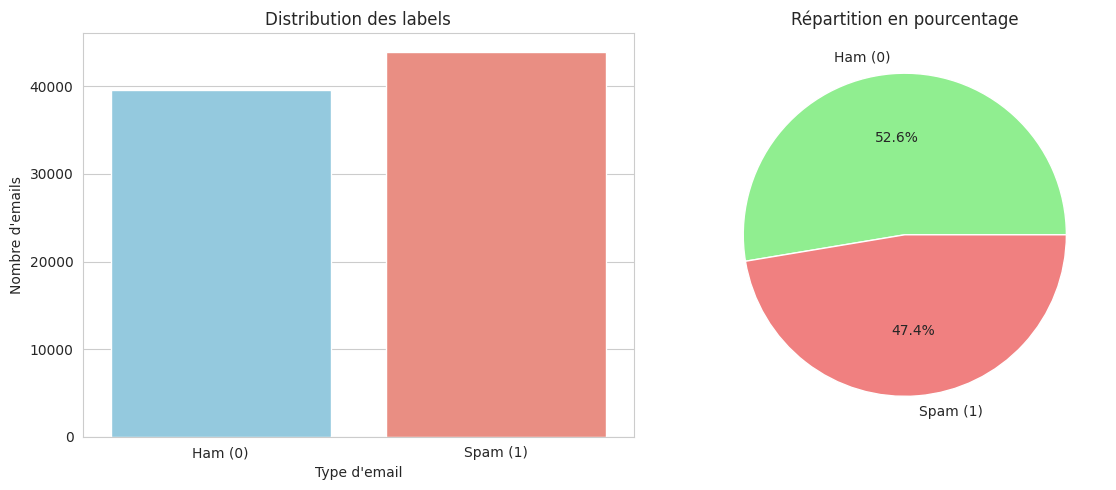

In [12]:
# Configuration du style
sns.set_style("whitegrid")

# Création de la visualisation
plt.figure(figsize=(12, 5))

# Premier subplot : diagramme en barres
plt.subplot(1, 2, 1)
ax = sns.countplot(x='label', data=data, hue='label', palette=['skyblue', 'salmon'], legend=False)
plt.title('Distribution des labels')
plt.xlabel('Type d\'email')
plt.ylabel('Nombre d\'emails')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])  # Méthode alternative

# Deuxième subplot : diagramme en camembert
plt.subplot(1, 2, 2)
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                colors=['lightgreen', 'lightcoral'],
                                labels=['Ham (0)', 'Spam (1)'])
plt.title('Répartition en pourcentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Prétraitement du texte

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Définition des features (X) et de la cible (y)
X = data["text"] # Texte des messages
y = data["label"] # Classes (1 = spam, 0 = non-spam)

# Séparation en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du vectorizer TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Application de la transformation
X_train_tfidf = vectorizer.fit_transform(X_train)  # Apprentissage sur train
X_test_tfidf = vectorizer.transform(X_test)  # Transformation du test

# Affichage la forme des matrices vectorisées
print("Shape du train:", X_train_tfidf.shape)
print("Shape du test:", X_test_tfidf.shape)

Shape du train: (66758, 5000)
Shape du test: (16690, 5000)


Vérifions que les données de Train et de Test sont bien équilibrées (balanced)

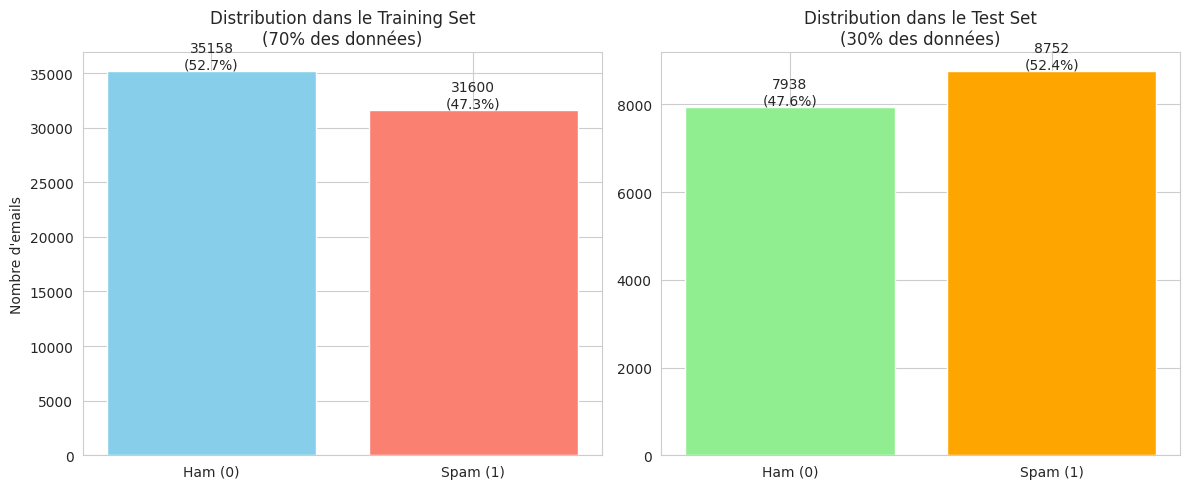

In [14]:
import collections

# On compte les occurrences
train_counts = collections.Counter(y_train)
test_counts = collections.Counter(y_test)

# Création de la figure
plt.figure(figsize=(12, 5))

# Graphique pour le training set
plt.subplot(1, 2, 1)
bars = plt.bar(['Ham (0)', 'Spam (1)'], train_counts.values(), color=['skyblue', 'salmon'])
plt.title('Distribution dans le Training Set\n(70% des données)')
plt.ylabel('Nombre d\'emails')

# Ajout des annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/sum(train_counts.values())*100:.1f}%)',
             ha='center', va='bottom')

# Graphique pour le test set
plt.subplot(1, 2, 2)
bars = plt.bar(['Ham (0)', 'Spam (1)'], test_counts.values(), color=['lightgreen', 'orange'])
plt.title('Distribution dans le Test Set\n(30% des données)')

# Ajout des annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/sum(test_counts.values())*100:.1f}%)',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Les données sont équilibrées (pas de grandes différences)

 ### Initialisation du modèle de régression logistique

Entraînement sur dataset complet...
Train samples: 66758, Test samples: 16690
Entraînement en cours...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Temps d'entraînement: 1.76 secondes

Évaluation sur le test set...

RÉSULTATS DÉTAILLÉS DU MODÈLE

MÉTRIQUES PRINCIPALES:
   • Précision (Accuracy): 0.9845 (98.45%)
   • Log Loss: 0.0702
   • ROC-AUC: 0.9982
   • Score F1: 0.9853
   • Temps d'entraînement: 1.76s

MÉTRIQUES PAR CLASSE (SPAM):
   • Précision: 0.9822
   • Rappel (Recall): 0.9885
   • Spécificité: 0.9802

MATRICE DE CONFUSION:
   • Vrais Positifs (TP): 8651
   • Faux Positifs (FP): 157
   • Faux Négatifs (FN): 101
   • Vrais Négatifs (TN): 7781

   Matrice complète:
   [[7781  157]
 [ 101 8651]]

RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



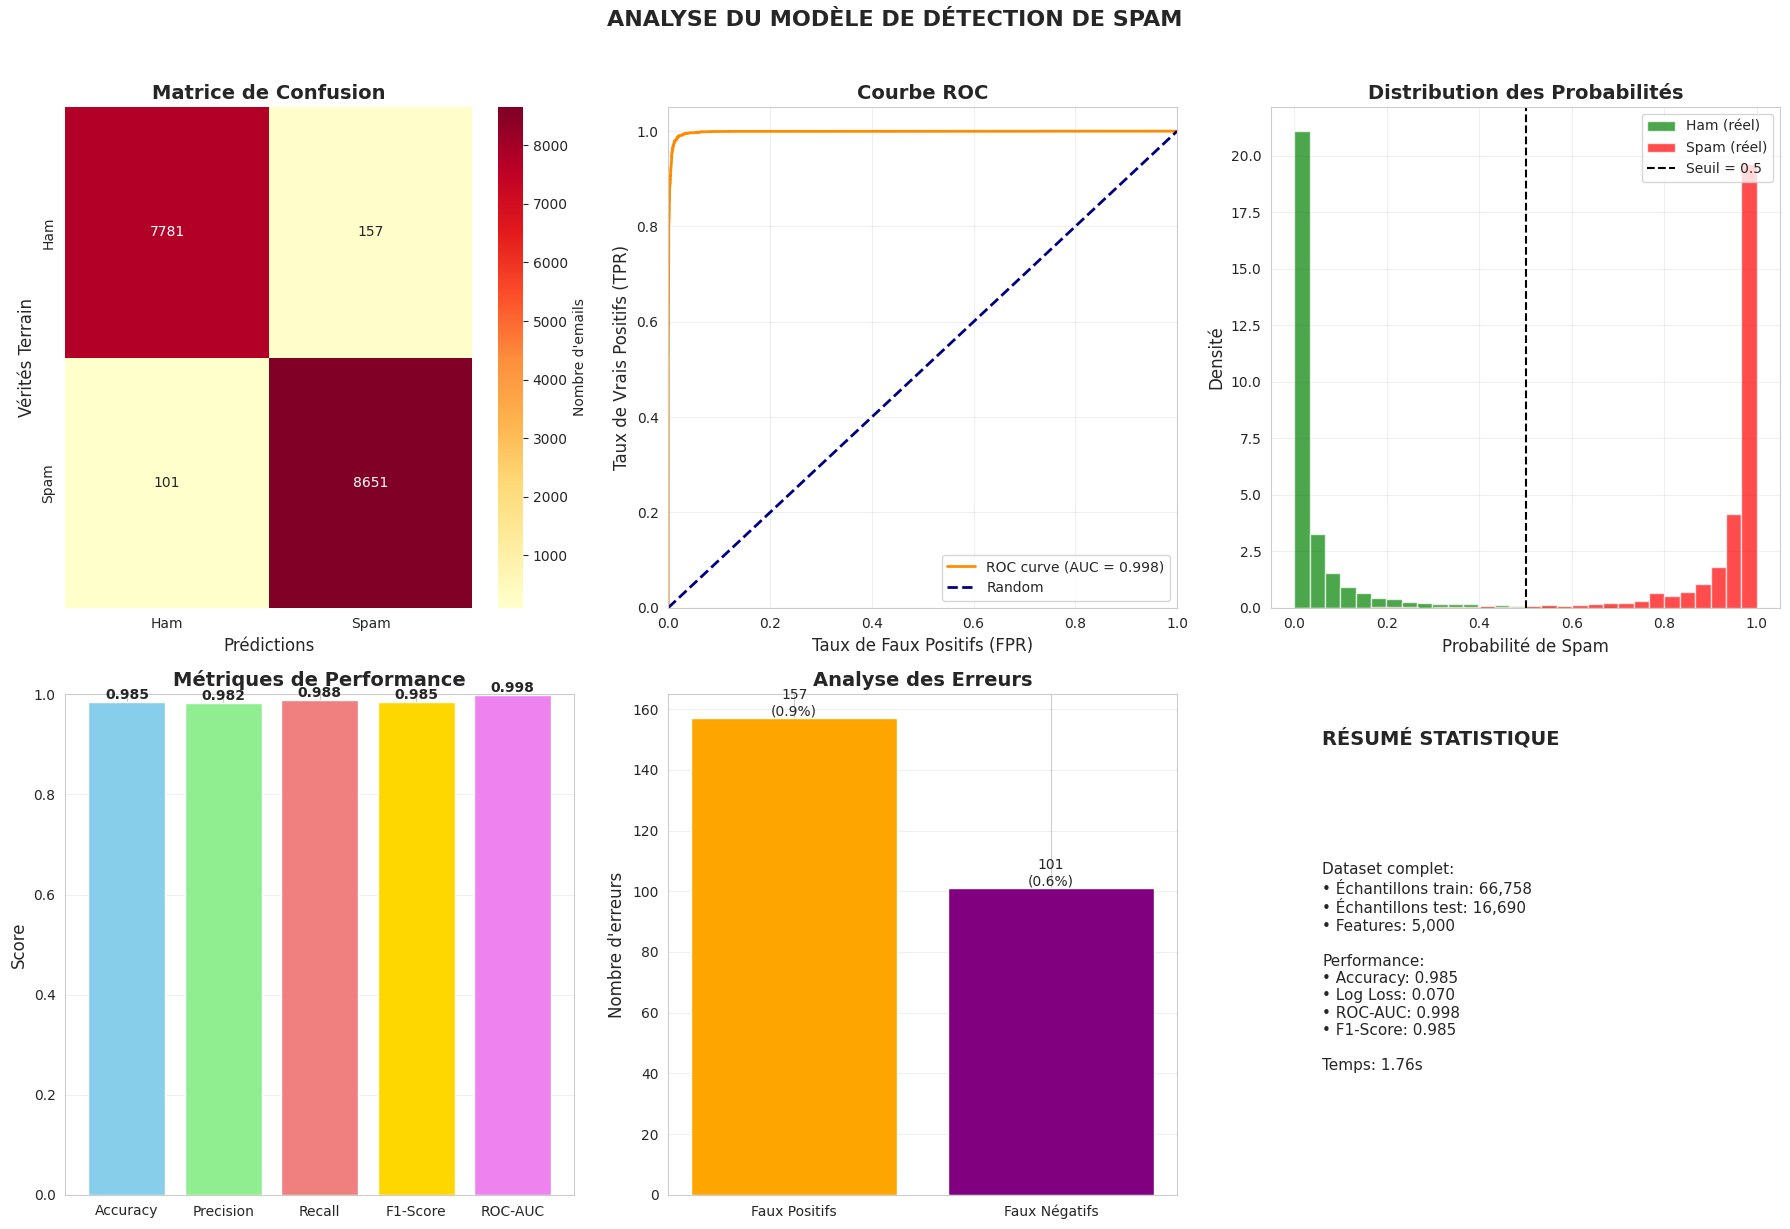

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

print("Entraînement sur dataset complet...")
print(f"Train samples: {X_train_tfidf.shape[0]}, Test samples: {X_test_tfidf.shape[0]}")

start_time = time.time()

# Modèle avec paramètres optimisés
model = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Entraînement en cours...")
model.fit(X_train_tfidf, y_train)
training_time = time.time() - start_time
print(f"Temps d'entraînement: {training_time:.2f} secondes")

# Prédictions
print("\nÉvaluation sur le test set...")
y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)

# Métriques détaillées
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n" + "="*70)
print("RÉSULTATS DÉTAILLÉS DU MODÈLE")
print("="*70)

print(f"\nMÉTRIQUES PRINCIPALES:")
print(f"   • Précision (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Log Loss: {logloss:.4f}")
print(f"   • ROC-AUC: {roc_auc:.4f}")
print(f"   • Score F1: {f1_score:.4f}")
print(f"   • Temps d'entraînement: {training_time:.2f}s")

print(f"\nMÉTRIQUES PAR CLASSE (SPAM):")
print(f"   • Précision: {precision:.4f}")
print(f"   • Rappel (Recall): {recall:.4f}")
print(f"   • Spécificité: {specificity:.4f}")

print(f"\nMATRICE DE CONFUSION:")
print(f"   • Vrais Positifs (TP): {tp}")
print(f"   • Faux Positifs (FP): {fp}")
print(f"   • Faux Négatifs (FN): {fn}")
print(f"   • Vrais Négatifs (TN): {tn}")
print(f"\n   Matrice complète:")
print(f"   {conf_matrix}")

print(f"\nRAPPORT DE CLASSIFICATION:")
print(class_report)

# ============================================
# VISUALISATIONS
# ============================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ANALYSE DU MODÈLE DE DÉTECTION DE SPAM', fontsize=16, fontweight='bold', y=1.02)

# 1. Matrice de confusion colorée
ax1 = axes[0, 0]
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
            cbar_kws={'label': 'Nombre d\'emails'}, ax=ax1)
ax1.set_title('Matrice de Confusion', fontsize=14, fontweight='bold')
ax1.set_xlabel('Prédictions', fontsize=12)
ax1.set_ylabel('Vérités Terrain', fontsize=12)

# 2. Courbe ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ax2 = axes[0, 1]
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
ax2.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
ax2.set_title('Courbe ROC', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

# 3. Distribution des probabilités
ax3 = axes[0, 2]
ham_probs = y_pred_proba[y_test == 0]
spam_probs = y_pred_proba[y_test == 1]
ax3.hist(ham_probs, bins=30, alpha=0.7, color='green', label='Ham (réel)', density=True)
ax3.hist(spam_probs, bins=30, alpha=0.7, color='red', label='Spam (réel)', density=True)
ax3.axvline(x=0.5, color='black', linestyle='--', label='Seuil = 0.5')
ax3.set_xlabel('Probabilité de Spam', fontsize=12)
ax3.set_ylabel('Densité', fontsize=12)
ax3.set_title('Distribution des Probabilités', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Métriques de performance
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [accuracy, precision, recall, f1_score, roc_auc]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet']

ax4 = axes[1, 0]
bars = ax4.bar(metrics_names, metrics_values, color=colors)
ax4.set_ylim([0, 1])
ax4.set_ylabel('Score', fontsize=12)
ax4.set_title('Métriques de Performance', fontsize=14, fontweight='bold')
ax4.grid(True, axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Comparaison des erreurs
error_types = ['Faux Positifs', 'Faux Négatifs']
error_counts = [fp, fn]
colors_errors = ['orange', 'purple']

ax5 = axes[1, 1]
bars_errors = ax5.bar(error_types, error_counts, color=colors_errors)
ax5.set_ylabel('Nombre d\'erreurs', fontsize=12)
ax5.set_title('Analyse des Erreurs', fontsize=14, fontweight='bold')
ax5.grid(True, axis='y', alpha=0.3)

# Ajout des pourcentages
total_predictions = len(y_test)
for bar, count in zip(bars_errors, error_counts):
    height = bar.get_height()
    percentage = (count / total_predictions) * 100
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

# 6. Résumé statistique
summary_text = f"""
Dataset complet:
• Échantillons train: {X_train_tfidf.shape[0]:,}
• Échantillons test: {X_test_tfidf.shape[0]:,}
• Features: {X_train_tfidf.shape[1]:,}

Performance:
• Accuracy: {accuracy:.3f}
• Log Loss: {logloss:.3f}
• ROC-AUC: {roc_auc:.3f}
• F1-Score: {f1_score:.3f}

Temps: {training_time:.2f}s
"""

ax6 = axes[1, 2]
ax6.text(0.1, 0.9, 'RÉSUMÉ STATISTIQUE', fontsize=14, fontweight='bold')
ax6.text(0.1, 0.7, summary_text, fontsize=11, verticalalignment='top')
ax6.axis('off')

plt.tight_layout()
plt.savefig('model_evaluation_detailed.png', dpi=300, bbox_inches='tight')
plt.show()


In [17]:
import numpy as np
np.__version__


'1.26.4'

### Déploiement

In [19]:
import joblib
import json
import os
import pandas as pd
import numpy as np

# Création du dossier model s'il n'existe pas
os.makedirs('model', exist_ok=True)

# ===============================
# SAUVEGARDE AVEC JOBLIB
# ===============================

model_filename = 'model/model.joblib'
vectorizer_filename = 'model/tfidf_vectorizer.joblib'

joblib.dump(model, model_filename)
print(f"Modèle sauvegardé avec joblib dans: {model_filename}")

joblib.dump(vectorizer, vectorizer_filename)
print(f"Vectorizer sauvegardé avec joblib dans: {vectorizer_filename}")

# ===============================
# MÉTADONNÉES (JSON)
# ===============================

def convert_to_serializable(obj):
    if isinstance(obj, (np.integer, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(item) for item in obj]
    elif pd.isna(obj):
        return None
    else:
        return obj

metadata = {
    'model_name': 'Spam Email Classifier',
    'algorithm': 'LogisticRegression',
    'accuracy': float(accuracy),
    'roc_auc': float(roc_auc),
    'feature_count': int(X_train_tfidf.shape[1]),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_info': {
        'train_samples': int(len(X_train)),
        'test_samples': int(len(X_test)),
        'class_distribution': {
            '0': int(y.value_counts().get(0, 0)),
            '1': int(y.value_counts().get(1, 0))
        }
    }
}

metadata = convert_to_serializable(metadata)

metadata_filename = 'model/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"Métadonnées sauvegardées dans: {metadata_filename}")

# Vérification
print("\nVerification des fichiers:")
print(f"Modèle: {os.path.exists(model_filename)}")
print(f"Vectorizer: {os.path.exists(vectorizer_filename)}")
print(f"Métadonnées: {os.path.exists(metadata_filename)}")

Modèle sauvegardé avec joblib dans: model/model.joblib
Vectorizer sauvegardé avec joblib dans: model/tfidf_vectorizer.joblib
Métadonnées sauvegardées dans: model/model_metadata.json

Verification des fichiers:
Modèle: True
Vectorizer: True
Métadonnées: True


### Test du modèle

In [20]:
import joblib

# ===============================
# Chargement du modèle et vectorizer
# ===============================

model = joblib.load('model/model.joblib')
vectorizer = joblib.load('model/tfidf_vectorizer.joblib')

# Vérification du type de modèle
print(f"Model type: {type(model).__name__}")

# ===============================
# Phrases de test
# ===============================

test_phrases = [
    "Win a free iPhone! Click here now",
    "Meeting tomorrow at 10 AM in conference room",
    "Your account has been hacked, verify immediately",
    "Hello, how are you doing?",
    "MAKE $1000 PER DAY WITH NO EFFORT!!!",
    "Invoice attached for January",
    "Congratulations! You are the winner of our lottery",
    "Project update: Please review the attached document",
    "URGENT: Your password needs to be reset",
    "Lunch tomorrow at 12:30 PM?"
]

print("=" * 60)
print("SPAM DETECTION TEST")
print("=" * 60)

for phrase in test_phrases:
    # Vectorisation
    phrase_vector = vectorizer.transform([phrase])

    # Prédiction
    prediction = model.predict(phrase_vector)[0]
    probabilities = model.predict_proba(phrase_vector)[0]

    ham_prob = probabilities[0]
    spam_prob = probabilities[1]

    # Résultat
    print(f"\nPhrase: '{phrase}'")
    print(f"Prediction: {'SPAM' if prediction == 1 else 'HAM'}")
    print(f"Probabilities: Ham={ham_prob:.3f}, Spam={spam_prob:.3f}")
    print(f"Confidence: {max(ham_prob, spam_prob):.1%}")
    print("-" * 40)

# ===============================
# Test phrase personnalisée
# ===============================

print("\n" + "=" * 60)
print("CUSTOM PHRASE TEST")
print("=" * 60)

your_phrase = "Limited time offer: Get 50% discount on all products"
print(f"Your phrase: '{your_phrase}'")

your_vector = vectorizer.transform([your_phrase])
your_prediction = model.predict(your_vector)[0]
your_probabilities = model.predict_proba(your_vector)[0]

print(f"Prediction: {'SPAM' if your_prediction == 1 else 'HAM'}")
print(f"Ham probability: {your_probabilities[0]:.3f}")
print(f"Spam probability: {your_probabilities[1]:.3f}")
print(f"Classification: {'SPAM' if your_probabilities[1] > 0.5 else 'HAM'} (threshold: 0.5)")


Model type: LogisticRegression
SPAM DETECTION TEST

Phrase: 'Win a free iPhone! Click here now'
Prediction: SPAM
Probabilities: Ham=0.092, Spam=0.908
Confidence: 90.8%
----------------------------------------

Phrase: 'Meeting tomorrow at 10 AM in conference room'
Prediction: HAM
Probabilities: Ham=0.957, Spam=0.043
Confidence: 95.7%
----------------------------------------

Phrase: 'Your account has been hacked, verify immediately'
Prediction: SPAM
Probabilities: Ham=0.036, Spam=0.964
Confidence: 96.4%
----------------------------------------

Phrase: 'Hello, how are you doing?'
Prediction: SPAM
Probabilities: Ham=0.203, Spam=0.797
Confidence: 79.7%
----------------------------------------

Phrase: 'MAKE $1000 PER DAY WITH NO EFFORT!!!'
Prediction: SPAM
Probabilities: Ham=0.231, Spam=0.769
Confidence: 76.9%
----------------------------------------

Phrase: 'Invoice attached for January'
Prediction: HAM
Probabilities: Ham=0.842, Spam=0.158
Confidence: 84.2%
----------------------------